In [1]:
from ML_func import fcolumns, finfo, fzdata, fboxplot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import time

data_file = '../data/fish.csv'
fishDF = pd.read_csv(data_file, usecols=[0, 1, 2])
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [2]:
bream = fcolumns(fishDF, 'Species', 'Bream', 'bream')
bream

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [3]:
bream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  35 non-null     object 
 1   Weight   35 non-null     float64
 2   Length   35 non-null     float64
dtypes: float64(2), object(1)
memory usage: 968.0+ bytes


In [4]:
finfo(bream)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  35 non-null     object 
 1   Weight   35 non-null     float64
 2   Length   35 non-null     float64
dtypes: float64(2), object(1)
memory usage: 968.0+ bytes
None,


  Species  Weight  Length
0   Bream   242.0    25.4
1   Bream   290.0    26.3
2   Bream   340.0    26.5,


   Species  Weight  Length
32   Bream   925.0    39.5
33   Bream   975.0    41.0
34   Bream   950.0    41.0,


            Weight     Length
count    35.000000  35.000000
mean    617.828571  33.108571
std     209.205709   3.911925
min     242.000000  25.400000
25%     462.500000  30.350000
50%     610.000000  33.000000
75%     717.000000  35.000000
max    1000.000000  41.000000


In [5]:
bream1 = bream[['Weight', 'Length']]

In [6]:
fzdata(bream1)

mean_value, std_value :  Weight    617.828571
Length     33.108571
dtype: float64 Weight    209.205709
Length      3.911925
dtype: float64


# 양끝단 제거를 위한 기준값 임의로 잡기=> 1.0
# base = 1.0
# mask = z_data.abs()>base
# DF[~mask].dropna(inplace=True)


,Weight,Length
0,-1.796455,-1.970531
1,-1.567015,-1.740466
2,-1.328016,-1.689340
3,-1.218077,-1.050268
4,-0.897818,-1.050268
5,-0.802218,-0.871328
6,-0.563219,-0.871328
7,-1.089017,-0.794640
8,-0.802218,-0.794640
9,-0.563219,-0.615700


In [7]:
bream1.quantile(0.25).iloc[0]

462.5

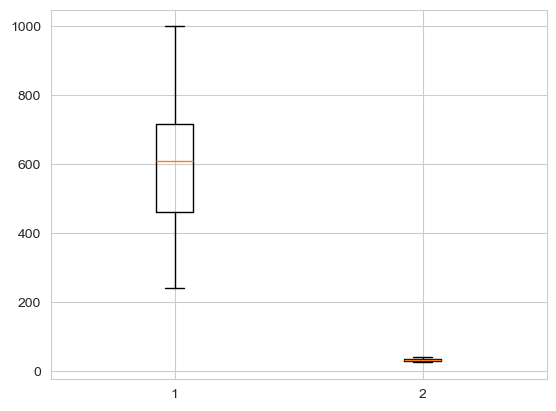

In [8]:
plt.boxplot(bream1)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1697ea580>,
 'caps': [<matplotlib.lines.Line2D at 0x1697eaac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1697ea400>,
 'medians': [<matplotlib.lines.Line2D at 0x1697f9040>,
 'fliers': [<matplotlib.lines.Line2D at 0x1697f92e0>,
 'means': []}

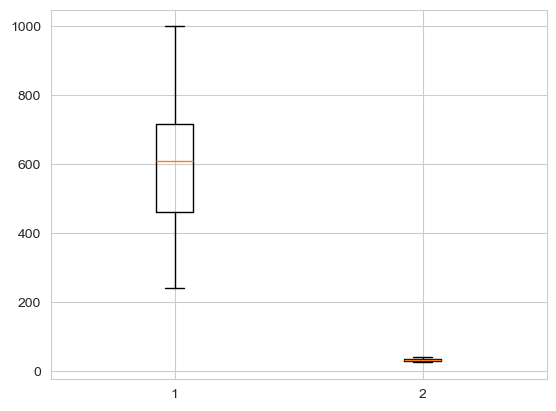

In [9]:
plt.boxplot(bream1)

'최저 :', 242.0, 
    '1QR :' 462.5, 
    '3QR :' 717.0
    '최고 :' 1000.0)
IQR : -254.5


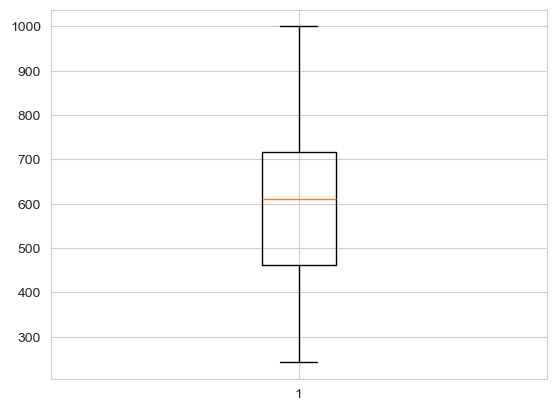

In [13]:
fboxplot(bream1['Weight'])

6

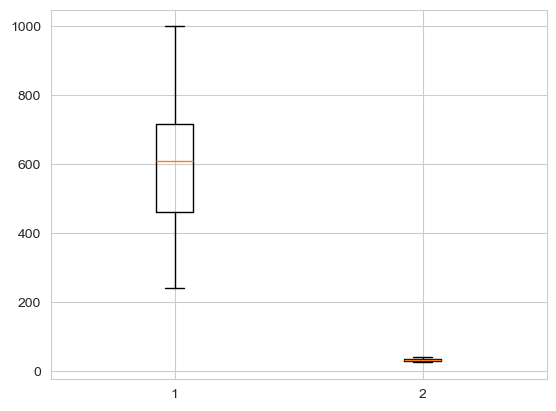

In [11]:
bp_obj = plt.boxplot(bream1)
len(bp_obj)
# for i in range(len(bp_obj)):